In [1]:
import networkx as nx

import searcher

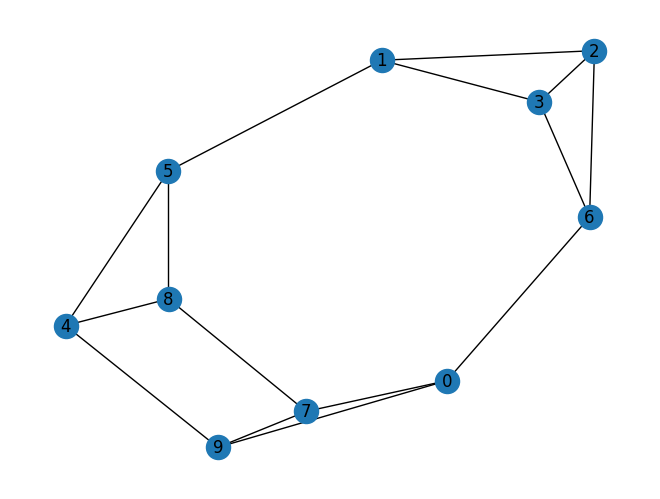

In [3]:
g = searcher.get_graph_from_path(
    "/home/jegkocka88/github/Zero-Forcing-in-Graphs/sim_results/zf_10_0.4_06a3e440-8ca7-463b-95aa-23ca7519db01")
nx.draw(g, with_labels=True)

In [5]:
def inject_pendant(g: nx.Graph, i: int, j: int):
    base = len(g.nodes)
    neighbors = nx.to_dict_of_lists(g, g.nodes)
    # TODO: verify ij is an edge
    neighbors[i].remove(j)
    neighbors[j].remove(i)
    
    neighbors[base] = [i,j, base + 1]
    neighbors[base + 1] = [base, base + 2, base + 3]
    neighbors[base + 2] = [base + 1, base + 4, base + 5]
    neighbors[base + 3] = [base + 1, base + 4, base + 5]
    neighbors[base + 4] = [base + 2, base + 3, base + 5]
    neighbors[base + 5] = [base + 2, base + 3, base + 4]
    
    return nx.from_dict_of_lists(neighbors)

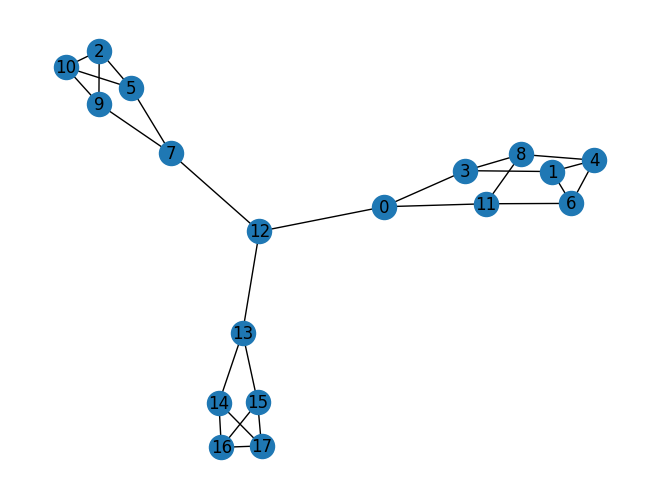

In [6]:
nx.draw(inject_pendant(g, 0, 7), with_labels=True)

In [4]:
from zero_forcing import calculate_zero_forcing_nr

def calculate_zfr(g: nx.Graph):
    return calculate_zero_forcing_nr([set(v) for v in nx.to_dict_of_lists(g).values()]) / len(g)

In [5]:
def inject_all(g):
    best_new_g = None
    best_ratio = calculate_zfr(g)
    for a, b in list(g.edges):
        print(f"Doing {a}-{b}")
        new_g = inject_pendant(g, a, b)
        zfr = calculate_zfr(new_g)
        if zfr > best_ratio:
            best_ratio = zfr
            best_new_g = new_g
        print(f"({a}, {b}): {zfr}")
    return best_new_g, best_ratio

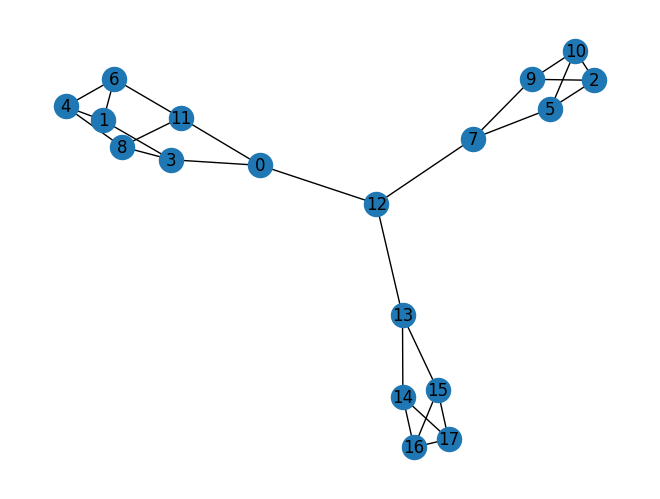

In [8]:
gg = inject_pendant(g, 0, 7);nx.draw(gg, with_labels=True)

In [7]:
len(gg)

18

In [14]:
ngg = inject_all(g)

    -> Checking subsets of size 1
    -> Checking subsets of size 2
    -> Checking subsets of size 3
    -> Checking subsets of size 4
    -> Checking subsets of size 5
    -> Checking subsets of size 6
Doing 0-9
    -> Checking subsets of size 1
    -> Checking subsets of size 2
    -> Checking subsets of size 3
    -> Checking subsets of size 4
    -> Checking subsets of size 5
    -> Checking subsets of size 6
    -> Checking subsets of size 7
    -> Checking subsets of size 8
(0, 9): 0.4444444444444444
Doing 0-2
    -> Checking subsets of size 1
    -> Checking subsets of size 2
    -> Checking subsets of size 3
    -> Checking subsets of size 4
    -> Checking subsets of size 5
    -> Checking subsets of size 6
    -> Checking subsets of size 7
    -> Checking subsets of size 8
(0, 2): 0.4444444444444444
Doing 0-11
    -> Checking subsets of size 1
    -> Checking subsets of size 2
    -> Checking subsets of size 3
    -> Checking subsets of size 4
    -> Checking subsets of size

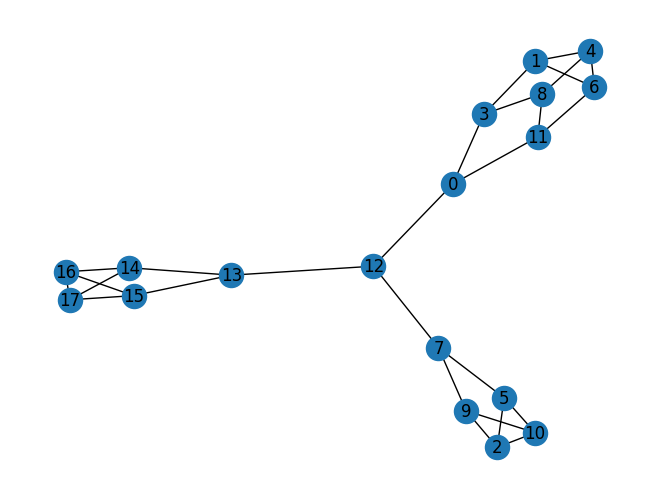

In [15]:
nx.draw(gg, with_labels=True)

In [9]:
#ggg = inject_pendant(gg, 0, 12) -> 0.41
ggg = inject_pendant(gg, 7, 12)

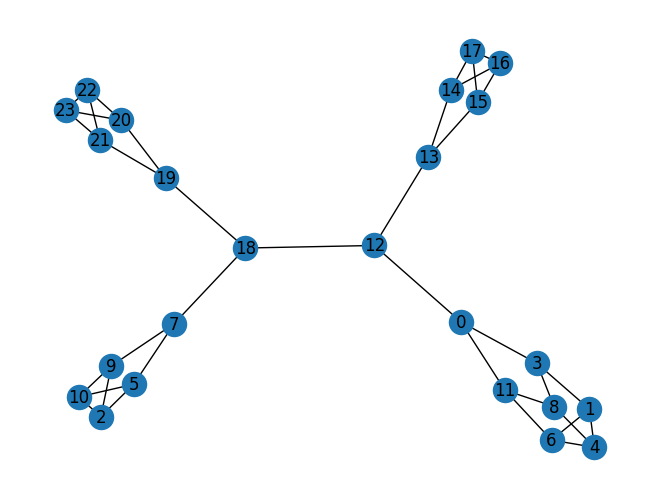

In [11]:
nx.draw(ggg, with_labels=True)

In [12]:
calculate_zfr(ggg)

    -> Checking subsets of size 1
    -> Checking subsets of size 2
    -> Checking subsets of size 3
    -> Checking subsets of size 4
    -> Checking subsets of size 5
    -> Checking subsets of size 6
    -> Checking subsets of size 7
    -> Checking subsets of size 8
    -> Checking subsets of size 9
    -> Checking subsets of size 10


0.4166666666666667